<a href="https://colab.research.google.com/github/Aarohi-jain84/reaction-type-classifier/blob/main/reaction_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Classification Report:
               precision    recall  f1-score   support

    Addition       1.00      0.50      0.67         2
 Elimination       0.00      0.00      0.00         0
Substitution       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.67      0.50      0.56         3
weighted avg       1.00      0.67      0.78         3



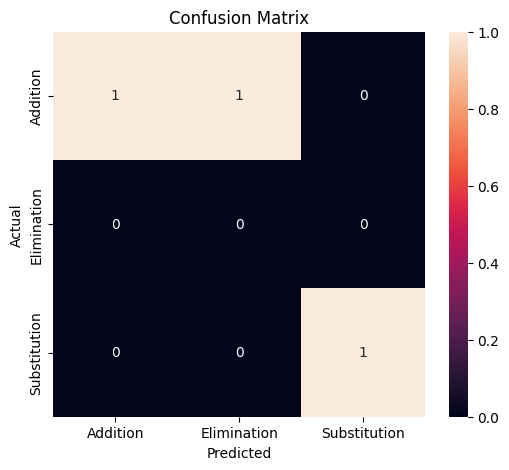

Example input: Bromine adds to the alkene double bond
Predicted reaction type: Addition


In [1]:
# Reaction Type Classification using Random Forest

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# 2. Load dataset
data = pd.read_csv('dataset.csv')

# 3. Data preprocessing function
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = ''.join([ch for ch in text if ch not in string.punctuation])  # remove punctuation
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)

data['cleaned_text'] = data['reaction_description'].apply(preprocess_text)

# 4. Prepare features and labels
X = data['cleaned_text']
y = data['reaction_type']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# 8. Evaluate model
y_pred = clf.predict(X_test_tfidf)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 9. Prediction function for new inputs
def predict_reaction(text):
    text_clean = preprocess_text(text)
    vect = vectorizer.transform([text_clean])
    prediction = clf.predict(vect)[0]
    return prediction

# Example prediction
example = "Bromine adds to the alkene double bond"
print(f"Example input: {example}")
print(f"Predicted reaction type: {predict_reaction(example)}")
